In [1]:
import os
import sys
from pathlib import Path

# setting proper working directory
PROJECT_DIRECTORY = Path(os.path.abspath('')).resolve().parents[0]
sys.path.extend([str(PROJECT_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')
print('Project directory: ', PROJECT_DIRECTORY)

Python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)] on win32
Project directory:  C:\Users\s8347434\Documents\RecBole-GNN


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [152]:
hyper_search_results = pd.read_csv("../hyper/results/results_combined.csv", sep="\t")

## One Plot for kNN-Algorithms

In [234]:
def line_plot_parameter_influence(df, parameters, metric, algorithms=None, custom_labels=None):
    """
    Plot the influence of parameters on a specified metric for selected algorithms in the dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing algorithms, parameters, and the metric.
        parameters (list): List of parameters to plot.
        metric (tuple): Tuple with the metric column name and label (e.g., ('test_ndcg@10', 'NDCG@10')).
        algorithms (list or None): List of algorithms to include in the plot (default: None, includes all algorithms).
        custom_labels (dict or None): Dictionary with algorithm names as keys and custom legend labels as values.

    Returns:
        None
    """
    tu_dd_blue = (0 / 255, 48 / 255, 93 / 255)
    bu_green1 = (138 / 255, 203 / 255, 193 / 255)

    # Define custom colors
    colors = {
        "asymitemknn": bu_green1,
        "asymuserknn": tu_dd_blue,
    }

    # Filter dataframe for the selected algorithms
    if algorithms:
        df = df[df['algorithm'].isin(algorithms)]  # Select multiple algorithms

    # Calculate optimal number of rows and columns per plot
    number_of_params = len(parameters)
    max_cols = 4
    cols = min(number_of_params, max_cols)  # Limit columns to max_cols or fewer
    rows = (number_of_params + cols - 1) // cols  # Calculate the number of rows

    # Create the subplots
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 6 * rows))

    index = 0
    for row in range(rows):
        for col in range(cols):
            if index >= len(parameters):
                axis = ax[row, col] if rows > 1 else ax[col]
                axis.axis('off')
                continue

            # Extract the current parameter and metric for plotting
            param_name, param_label = parameters[index]
            metric_name, metric_label = metric

            axis = ax[row, col] if rows > 1 else ax[col]

            for algorithm in df['algorithm'].unique():
                algorithm_data = df[df['algorithm'] == algorithm]
                mean_value = algorithm_data.groupby(param_name)[metric_name].mean()

                sns.lineplot(
                    x=mean_value.index,
                    y=mean_value.values,
                    ax=axis,
                    linewidth=2,
                    color=colors.get(algorithm, "black"),
                    legend=None  # Do not add legends for subplots
                )

            axis.set_xlabel(f"{param_label}", fontsize=25)

            if index == 0 or index == 4:
                axis.set_ylabel(f"{metric[1]}", fontsize=25)
            else:
                axis.set_ylabel("")
                axis.tick_params(labelleft=False)
                axis.set_yticklabels([])

            axis.tick_params(axis='x', labelsize=20)
            axis.tick_params(axis='y', labelsize=20)

            for spine in axis.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.8)
                spine.set_color('black')

            axis.minorticks_on()
            axis.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')

            index += 1

    # Create custom legend handles for consistent line styles and colors
    legend_handles = [
        Line2D([0], [0], color=colors[algorithm], lw=2, label=custom_labels.get(algorithm, algorithm) if custom_labels else algorithm)
        for algorithm in df['algorithm'].unique()
    ]

    # Add the legend with transparency
    fig.legend(
        handles=legend_handles,
        loc="upper center",
        bbox_to_anchor=(0.5, 0.15),  # Adjusted position
        ncol=len(df['algorithm'].unique()),
        fontsize=20,
        framealpha=0.4  # Transparent legend background
    )

    plt.tight_layout()
    fig.subplots_adjust(bottom=0.3)

    plt.savefig("../asset/plots/hyper_setting_line_knn.png", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()


In [235]:
from matplotlib.lines import Line2D

def scatter_plot_parameter_influence(df, parameters, metric, algorithms=None, custom_labels=None):
    """
    Plot the influence of parameters on a specified metric for selected algorithms in the dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing algorithms, parameters, and the metric.
        parameters (list): List of parameters to plot.
        metric (tuple): Tuple with the metric column name and label (e.g., ('test_ndcg@10', 'NDCG@10')).
        algorithm (list or None): Algorithms to include in the plot (default: None, includes all algorithms).
        custom_labels (dict or None): Dictionary with algorithm names as keys and custom legend labels as values.

    Returns:
        None
    """
    # Define custom colors
    colors = {
        "asymitemknn": (138 / 255, 203 / 255, 193 / 255),
        "asymuserknn": (0 / 255, 48 / 255, 93 / 255),
    }
    default_color = (0 / 255, 0 / 255, 0 / 255)  # Default black if no color is defined

    # Filter dataframe for the selected algorithms
    if algorithms:
        df = df[df['algorithm'].isin(algorithms)]

    # Calculate optimal number of rows and columns per plot
    number_of_params = len(parameters)
    max_cols = 4
    cols = min(number_of_params, max_cols)  # Limit columns to max_cols or fewer
    rows = (number_of_params + cols - 1) // cols  # Calculate the number of rows

    # Create the subplots
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 6 * rows))

    index = 0
    for row in range(rows):
        for col in range(cols):
            if index >= len(parameters):
                # Turn off unused subplots
                if rows > 1:
                    axis = ax[row, col]
                else:
                    axis = ax[col]
                axis.axis('off')
                continue

            # Determine the current axis
            if rows > 1:
                axis = ax[row, col]
            else:
                axis = ax[col]

            # Extract the current parameter and metric for plotting
            param_name, param_label = parameters[index]
            metric_name, metric_label = metric

            # Plot data for each algorithm (using raw observations)
            for algo in df['algorithm'].unique():
                algorithm_data = df[df['algorithm'] == algo]

                # Plot the raw observations as scatter points
                sns.scatterplot(
                    x=algorithm_data[param_name],  # Use raw observations of the parameter
                    y=algorithm_data[metric_name],  # Use the raw values for the metric
                    ax=axis,
                    color=colors.get(algo, default_color),  # Use the predefined color or default black
                    label=custom_labels.get(algo, algo) if custom_labels else algo,  # Use custom label if provided
                    alpha=0.7,  # Semi-transparent points
                    legend=None  # Do not add legends for subplots
                )

            # Set the labels and titles using LaTeX-style formatting
            axis.set_xlabel(f"{param_label}", fontsize=25)

            # Only set y-label for the first column
            if col == 0:
                axis.set_ylabel(f"{metric_label}", fontsize=25)
            else:
                axis.set_ylabel("")
                axis.tick_params(labelleft=False)  # Disable y-ticks
                axis.set_yticklabels([])  # Clear y-tick labels

            # Increase the size of x-ticks and y-ticks
            axis.tick_params(axis='x', labelsize=20)
            axis.tick_params(axis='y', labelsize=20)

            # Show axis spines explicitly
            for spine in axis.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.8)
                spine.set_color('black')

            # Add grid and axis lines
            axis.minorticks_on()
            axis.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')

            # Move to the next parameter
            index += 1

    # Create a custom legend (single consolidated legend for the entire figure)
    legend_handles = [
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            markerfacecolor=colors.get(algo, default_color),
            markersize=10,
            label=custom_labels.get(algo, algo) if custom_labels else algo
        )
        for algo in df['algorithm'].unique()
    ]

    fig.legend(
        handles=legend_handles,
        loc="upper center",
        bbox_to_anchor=(0.5, 0.1),  # Adjusted position for legend
        ncol=len(df['algorithm'].unique()),
        fontsize=20,
        framealpha=0.4  # Transparent legend background
    )

    # Adjust layout to avoid cutting labels
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.25)

    # Save the figure
    plt.savefig("../asset/plots/hyper_setting_scatter_knn.png", dpi=300, transparent=True)

    # Show the plot
    plt.show()


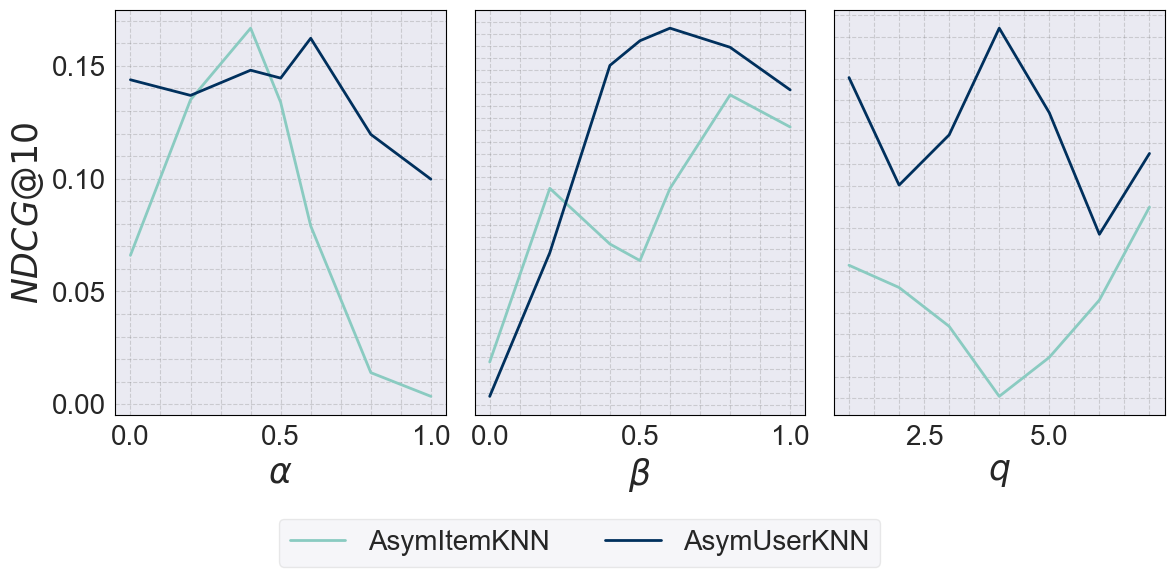

In [237]:
# Parameters to plot
parameters = [['alpha', '$\\alpha$'], ['beta', '$\\beta$'],  ['q', '$q$']]

# Specify algorithms to include
selected_algorithm = ['asymuserknn', 'asymitemknn']
labels = {'asymitemknn' : 'AsymItemKNN', 'asymuserknn': 'AsymUserKNN'}

# Call the function
line_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithms=selected_algorithm,
    custom_labels=labels
)

## Single Plots for each Algorithm

In [ ]:
def line_plot_parameter_influence(df, parameters, metric, algorithm=None):
    """
    Plot the influence of parameters on a specified metric for selected algorithms in the dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing algorithms, parameters, and the metric.
        parameters (list): List of parameters to plot.
        metric (str): The column name of the metric to plot (e.g., 'test_ndcg@10').
        algorithms (list or None): List of algorithms to include in the plot (default: None, includes all algorithms).
        n_cols (int): Number of columns in the grid layout (default: 4).

    Returns:
        None
    """
    # Define custom colors
    tu_dd_blue = (0 / 255, 48 / 255, 93 / 255)

    # Filter dataframe for the selected algorithm
    if algorithm:
        df = df[df['algorithm'] == algorithm]

    # Calculate optimal number of rows and columns per plot
    number_of_params = len(parameters)
    max_cols = 4
    cols = min(number_of_params, max_cols)  # Limit columns to max_cols or fewer
    rows = (number_of_params + cols - 1) // cols  # Calculate the number of rows
    
    # Create the subplots
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 6 * rows))

    index = 0
    # Loop through the parameters and plot
    for row in range(rows):
        for col in range(cols):
            if index >= len(parameters):
                axis = ax[row, col]
                axis.axis('off')
                continue
            # Extract the current parameter and metric for plotting
            param_name, param_label = parameters[index]
            metric_name, metric_label = metric

            if cols == 1:
                axis = ax
            else:
                if rows > 1:
                    axis = ax[row, col]
                else:
                    axis = ax[col]

            # Calculate the mean of the metric for the current parameter
            mean_value = df.groupby(param_name)[metric_name].mean()

            # Now plot the mean line using sns.lineplot to ensure consistency
            sns.lineplot(
                x=mean_value.index,
                y=mean_value.values,
                ax=axis,
                #label="Mean",
                color=tu_dd_blue,
                linewidth=2
            )
            
            # Set the labels and titles using LaTeX-style formatting
            axis.set_xlabel(f"{param_label}", fontsize=25)

            # Only set y-label and y-ticks for the first plot
            if index == 0:
                axis.set_ylabel(f"{metric[1]}", fontsize=25)
            elif index == 4:
                axis.set_ylabel(f"{metric[1]}", fontsize=25)
            else:
                axis.set_ylabel("")
                axis.tick_params(labelleft=False)  # Disable y-ticks
                axis.set_yticklabels([])          # Explicitly clear y-tick labels
            
            # Increase the size of x-ticks and y-ticks
            axis.tick_params(axis='x', labelsize=20)
            axis.tick_params(axis='y', labelsize=20)
            #axis.legend(fontsize=20) 
            
            # Show axis spines explicitly
            for spine in axis.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.8)
                spine.set_color('black')
            
            # Add grid and axis lines
            axis.minorticks_on()
            axis.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')  # Grid lines
            axis.grid(True, which='minor', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')  # Grid lines
            
            # Add the mean value annotation on the plot (if needed)
            #for x, y in zip(mean_value.index, mean_value.values):
            #    axis.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=12)

            if index < len(parameters):
                index += 1

            if col > 0:
                axis.set_ylabel("")  # Clear the y-axis label for all but the first column
                
    
    # Adjust layout
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.15)  # Add more space at the bottom for x-labels
    
    plt.savefig(f"../asset/plots/hyper_setting_line_{algorithm}.png", dpi=300, transparent=True)
    
    plt.show()

In [ ]:
def scatter_plot_parameter_influence(df, parameters, metric, algorithm=None):    
    """
    Plot the influence of parameters on a specified metric for selected algorithms in the dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset containing algorithms, parameters, and the metric.
        parameters (list): List of parameters to plot.
        metric (str): The column name of the metric to plot (e.g., 'test_ndcg@10').
        algorithm (str or None): Algorithm to include in the plot (default: None, includes all algorithms).
        
    Returns:
        None
    """
    # Define custom colors
    tu_dd_blue = (0 / 255, 48 / 255, 93 / 255)

    # Filter dataframe for the selected algorithm
    if algorithm:
        df = df[df['algorithm'] == algorithm]

    # Calculate optimal number of rows and columns per plot
    number_of_params = len(parameters)
    max_cols = 4
    cols = min(number_of_params, max_cols)  # Limit columns to max_cols or fewer
    rows = (number_of_params + cols - 1) // cols  # Calculate the number of rows
    
    # Create the subplots
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 6 * rows))

    index = 0
    # Loop through the parameters and plot
    for row in range(rows):
        for col in range(cols):
            if index >= len(parameters):
                axis = ax[row, col]
                axis.axis('off')
                continue
            if cols == 1:
                axis = ax
            else:
                if rows > 1:
                    axis = ax[row, col]
                else:
                    axis = ax[col]
                    
            # Plot the data
            sns.scatterplot(
                data=df,
                x=parameters[index][0],  # Adjusting the index to select the correct parameter
                y=metric[0],
                ax=axis,
                color=tu_dd_blue
            )
            
            # Set the labels and titles using LaTeX-style formatting
            axis.set_xlabel(f"{parameters[index][1]}", fontsize=25)
            
            # Only set y-label and y-ticks for the first plot
            if index == 0:
                axis.set_ylabel(f"{metric[1]}", fontsize=25)
            elif index == 4:
                axis.set_ylabel(f"{metric[1]}", fontsize=25)
            else:
                axis.set_ylabel("")
                axis.tick_params(labelleft=False)  # Disable y-ticks
                axis.set_yticklabels([])          # Explicitly clear y-tick labels
            
            # Increase the size of x-ticks and y-ticks
            axis.tick_params(axis='x', labelsize=20)
            axis.tick_params(axis='y', labelsize=20)
            
            # Show axis spines explicitly
            for spine in axis.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.8)
                spine.set_color('black')
            
            # Add grid and axis lines
            axis.minorticks_on()
            axis.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')  # Grid lines
            axis.grid(True, which='minor', linestyle='--', linewidth=0.8, alpha=0.3, color='gray')  # Grid lines
            
            
            # Move to the next parameter
            if index < len(parameters):
                index += 1

    # Adjust layout to avoid cutting labels
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.15)  # Add more space at the bottom for x-labels

    # Save the figure
    plt.savefig(f"../asset/plots/hyper_setting_scatter_{algorithm}.png", dpi=300, transparent=True)
    
    # Show the plot
    plt.show()


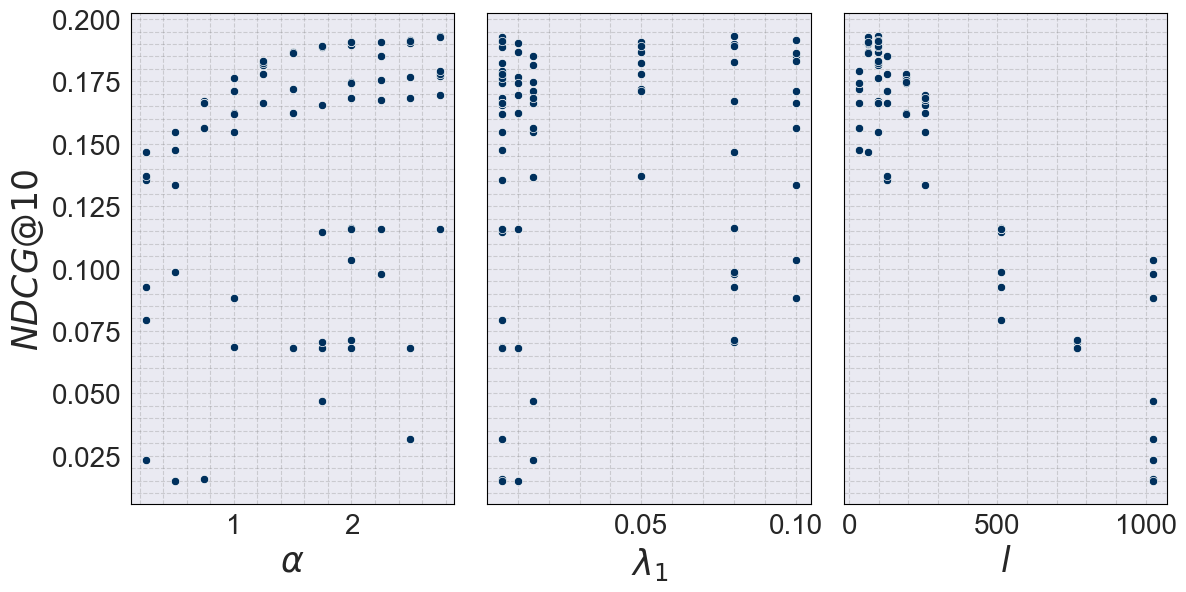

In [114]:
# Parameters to plot
parameters = [['alpha', '$\\alpha$'], ['regularization', '$\\lambda_1$'],  ['embedding_size', '$l$']]

# Specify algorithms to include
selected_algorithm = 'als'

# Call the function
scatter_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)

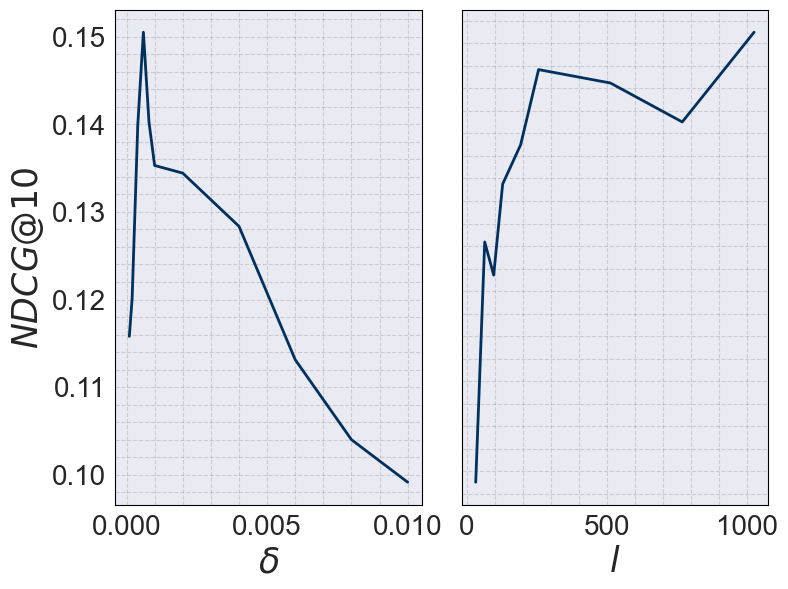

In [117]:
# Parameters to plot
parameters = [['learning_rate', '$\\delta$'], ['embedding_size', '$l$']]

# Specify algorithms to include
selected_algorithm = 'bpr'

# Call the function
line_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)

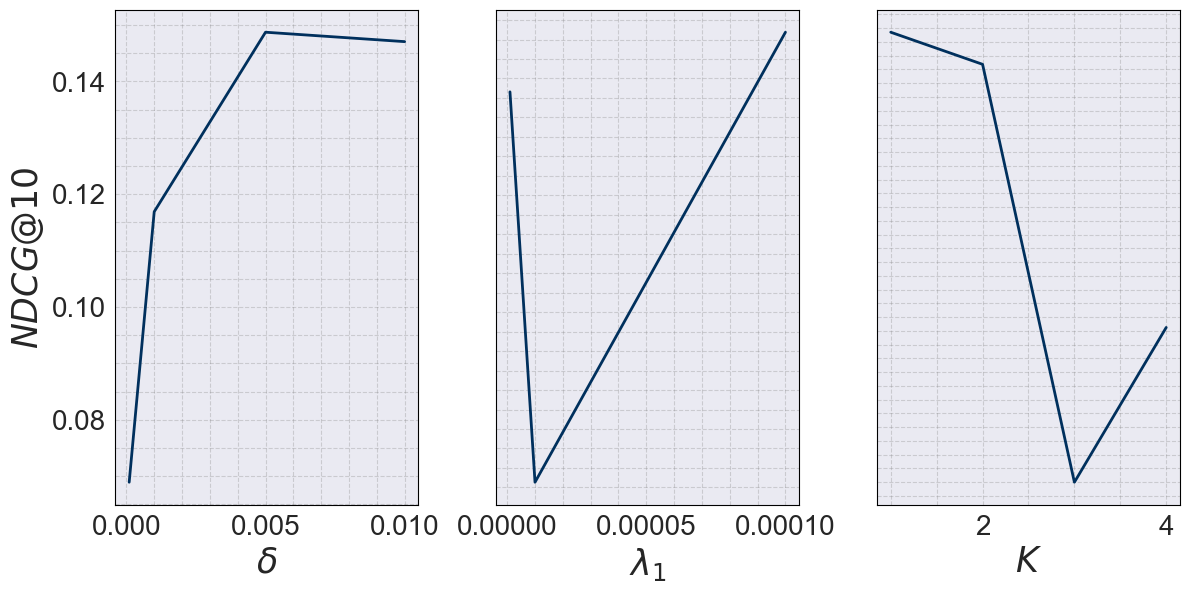

In [119]:
# Parameters to plot
parameters = [['learning_rate', '$\\delta$'], ['reg_weight', '$\\lambda_1$'], ['n_layers', '$K$']]

# Specify algorithms to include
selected_algorithm = 'lightgcn'

# Call the function
line_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)

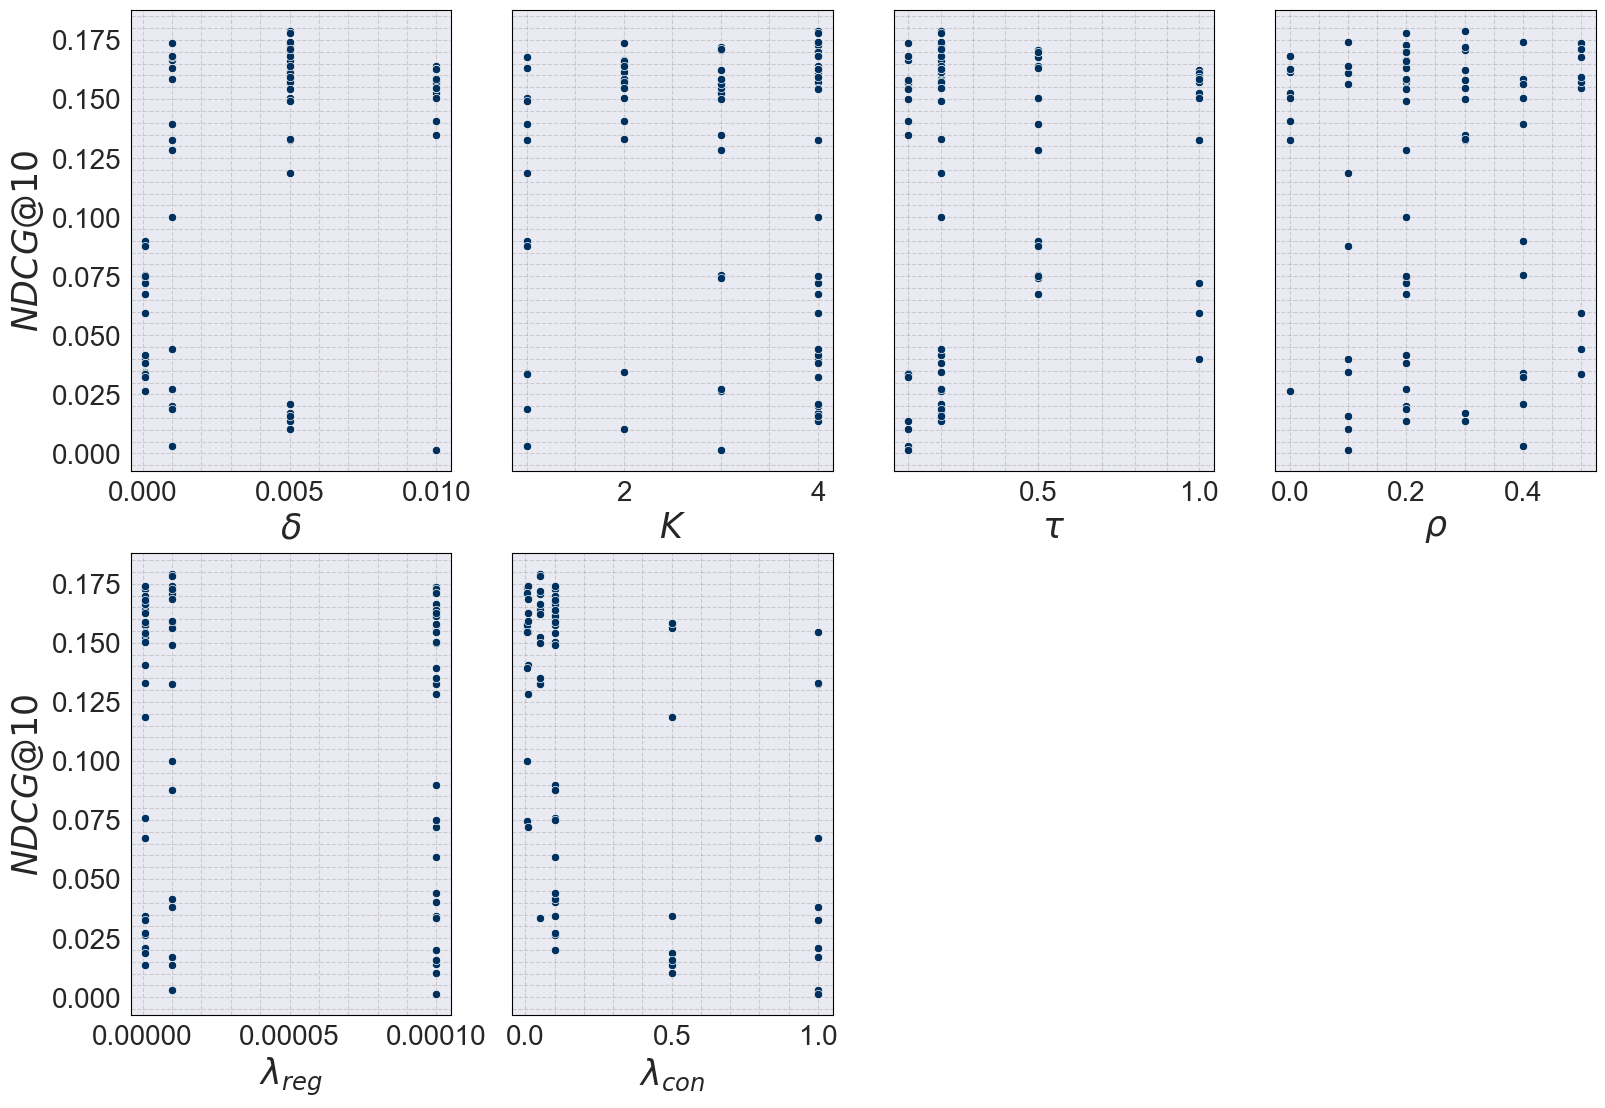

In [134]:
# Parameters to plot
parameters = [['learning_rate', '$\\delta$'], ['n_layers', '$K$'], ['ssl_tau', '$\\tau$'], ['drop_ratio', '$\\rho$'], ['reg_weight', '$\\lambda_{reg}$'], ['ssl_weight', '$\\lambda_{con}$']]

# Specify algorithms to include
selected_algorithm = 'sgl'

# Call the function
scatter_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)

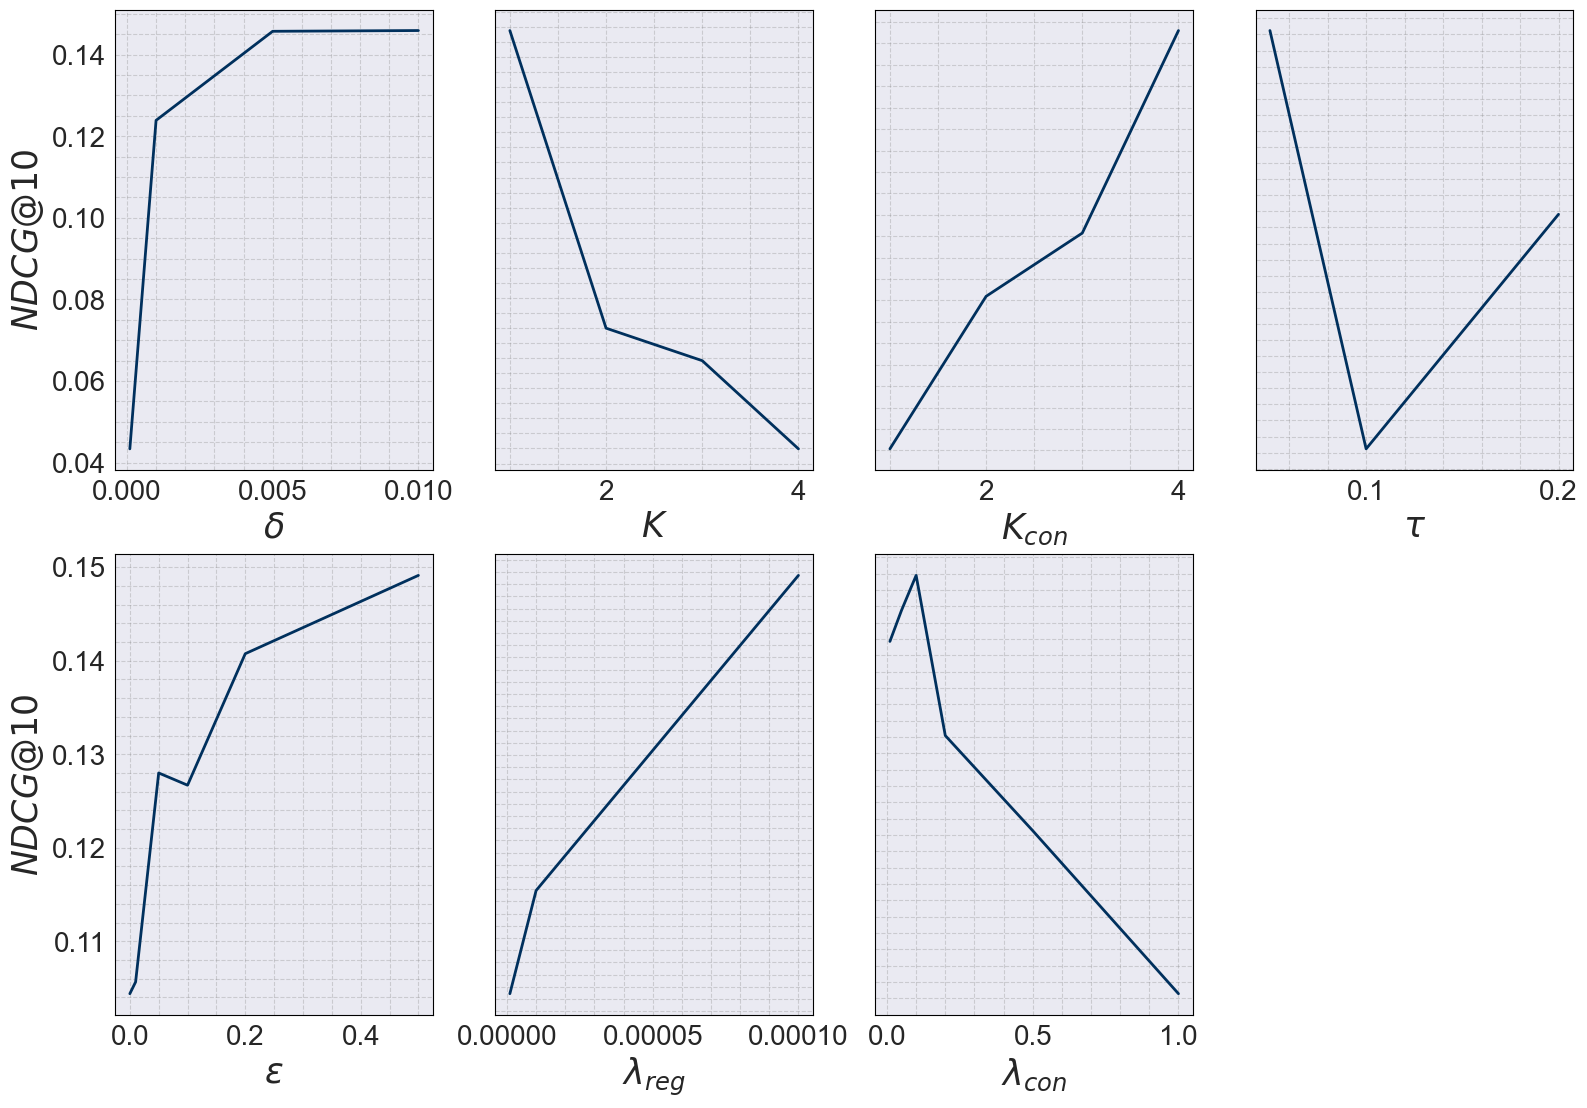

In [136]:
# Parameters to plot
parameters = [['learning_rate', '$\\delta$'], ['n_layers', '$K$'], ['layer_cl', '$K_{con}$'], ['temperature', '$\\tau$'], ['eps', '$\\epsilon$'], ['reg_weight', '$\\lambda_{reg}$'], ['lambda', '$\\lambda_{con}$']]

# Specify algorithms to include
selected_algorithm = 'xsimgcl'

# Call the function
line_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)

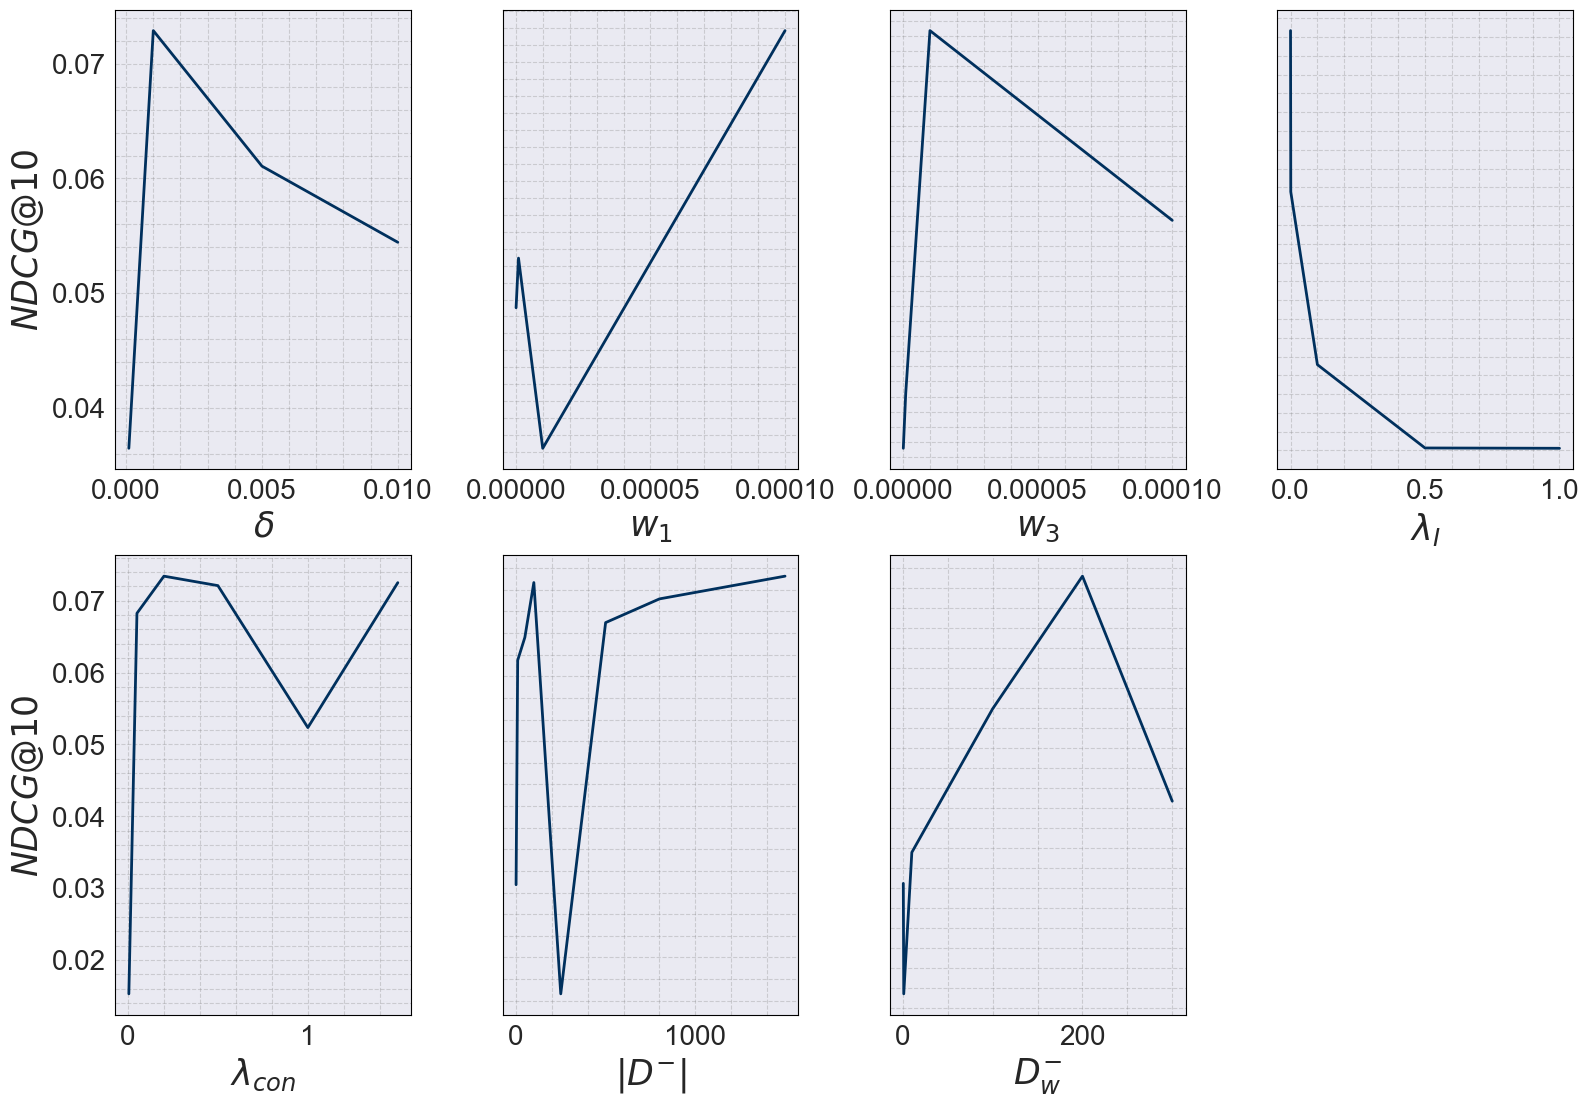

In [151]:
# Parameters to plot
parameters = [['learning_rate', '$\\delta$'], 
              ['w1', '$w_1$'], 
              ['w3', '$w_3$'], 
              ['gamma', '$\\lambda_{I}$'], 
              ['lambda', '$\\lambda_{con}$'], 
              ['negative_num', '$|D^{-}|$'], 
              ['negative_weight', '$D^{-}_w$']]

# Specify algorithms to include
selected_algorithm = 'ultragcn'

# Call the function
line_plot_parameter_influence(
    hyper_search_results,
    parameters=parameters,
    metric=['test_ndcg@10', '$NDCG@10$'],
    algorithm=selected_algorithm
)